In [2]:
import os
os.chdir('/home/sin/p/code/jupyter-notebook/V-COCO')
import sys
sys.path.insert(0,'/home/sin/p/code/jupyter-notebook/V-COCO/')
import vsrl_utils as vu
import json
import pandas as pd
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt

PATH = '/home/sin/p/dataset/V-COCO'
PATH = Path(PATH)



def draw_bbox(plt, ax, rois, fill=False, linewidth=2, edgecolor=[1.0, 0.0, 0.0], **kwargs):
    for i in range(rois.shape[0]):
        roi = rois[i,:].astype(np.int)
        ax.add_patch(plt.Rectangle((roi[0], roi[1]),
            roi[2] - roi[0], roi[3] - roi[1],
            fill=False, linewidth=linewidth, edgecolor=edgecolor, **kwargs))

cc = plt.get_cmap('hsv', lut=4)



In [3]:
coco = vu.load_coco()
vcoco_all = vu.load_vcoco('vcoco_train')
# print(vcoco_all[0].keys())
for x in vcoco_all:
    x = vu.attach_gt_boxes(x, coco)
# print(vcoco_all[0].keys())



loading annotations into memory...
Done (t=1.25s)
creating index...
index created!


In [4]:
def xyhw_to_xyxy(bbox):
    bbox = np.array(bbox)
    out = bbox.copy()
    out = np.array(out)
    out[[2, 3]] = bbox[[0, 1]] + bbox[[2, 3]]
    return out


[183192]
[154.49, 71.25, 158.32, 324.32]
[154.49  71.25 312.81 395.57]
/home/sin/p/dataset/V-COCO/train2017/000000226162.jpg


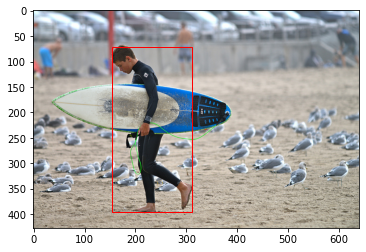

In [5]:
anno_id = vcoco_all[0]['ann_id'][0]
print(anno_id)
anno = coco.loadAnns(anno_id)[0]

bbox = anno['bbox']

print(bbox)
bbox = xyhw_to_xyxy(bbox)
print(bbox)

image_path = str(list(PATH.glob(f'*2017/*{anno["image_id"]}*'))[0])
print(image_path)
plt.figure()
ax = plt.gca()
image = plt.imread(image_path)
plt.imshow(image)

roi = bbox.astype(np.int)
ax.add_patch(plt.Rectangle((roi[0], roi[1]),
            roi[2] - roi[0], roi[3] - roi[1],
            fill=False, linewidth=1, edgecolor=cc(0)[:3]))

In [10]:

coco

In [9]:
role_id = vcoco_all[0]['role_object_id'][0]
role = coco.loadAnns(role_id)
print(role)

[{'segmentation': [[154.49, 93.32, 162.16, 81.8, 179.44, 71.25, 199.59, 83.72, 213.98, 100.99, 224.53, 110.59, 235.09, 123.06, 245.64, 137.46, 245.64, 146.09, 242.77, 165.28, 247.56, 184.47, 241.81, 208.46, 234.13, 224.77, 230.29, 232.45, 234.13, 238.21, 254.28, 244.93, 258.12, 245.88, 244.69, 280.43, 241.81, 294.82, 257.16, 307.3, 281.15, 321.69, 308.98, 346.64, 312.81, 363.91, 305.14, 385.98, 296.5, 392.7, 294.58, 385.98, 295.54, 376.38, 284.03, 352.39, 267.71, 338.96, 244.69, 328.41, 240.85, 326.49, 237.97, 349.52, 242.77, 367.75, 242.77, 384.06, 238.93, 395.57, 193.83, 393.66, 223.58, 381.18, 219.74, 353.35, 215.9, 336.08, 209.18, 312.09, 208.22, 299.62, 209.18, 279.47, 211.1, 259.32, 209.18, 251.64, 204.38, 246.84, 206.3, 233.41, 224.53, 188.31, 228.37, 164.32, 216.86, 151.85, 204.38, 148.97, 191.91, 144.17, 194.79, 123.06, 194.79, 118.26, 189.99, 126.9, 188.07, 127.86, 176.56, 124.02, 169.84, 117.31, 161.2, 109.63, 158.33, 103.87, 157.37, 96.19]], 'area': 12914.085899999996, 'isc

In [116]:
for i in  role:
    print(coco.cats[i['category_id']])
    print(i['bbox'])


{'supercategory': 'person', 'id': 1, 'name': 'person'}
[154.49, 71.25, 158.32, 324.32]
{'supercategory': 'sports', 'id': 42, 'name': 'surfboard'}
[35.3, 143.39, 355.59, 102.12]


In [96]:
# Action classes and roles in V-COCO
classes = [x['action_name'] for x in vcoco_all]
for i, x in enumerate(vcoco_all):
    print('{:>20s}'.format(x['action_name']), x['role_name'])


cls_id = classes.index('hit')
vcoco = vcoco_all[cls_id]

                hold ['agent', 'obj']
               stand ['agent']
                 sit ['agent', 'instr']
                ride ['agent', 'instr']
                walk ['agent']
                look ['agent', 'obj']
                 hit ['agent', 'instr', 'obj']
                 eat ['agent', 'obj', 'instr']
                jump ['agent', 'instr']
                 lay ['agent', 'instr']
       talk_on_phone ['agent', 'instr']
               carry ['agent', 'obj']
               throw ['agent', 'obj']
               catch ['agent', 'obj']
                 cut ['agent', 'instr', 'obj']
                 run ['agent']
    work_on_computer ['agent', 'instr']
                 ski ['agent', 'instr']
                surf ['agent', 'instr']
          skateboard ['agent', 'instr']
               smile ['agent']
               drink ['agent', 'instr']
                kick ['agent', 'obj']
               point ['agent', 'instr']
                read ['agent', 'obj']
           snowboard ['agent'

In [9]:
vcoco

{'image_id': array([[226162],
        [210751],
        [433398],
        ...,
        [314204],
        [234642],
        [419349]]),
 'ann_id': array([[ 183192],
        [ 183193],
        [ 183205],
        ...,
        [2207726],
        [2207790],
        [2207940]]),
 'role_object_id': array([[ 183192,       0,       0],
        [ 183193,       0,       0],
        [ 183205,       0,       0],
        ...,
        [2207726,       0,       0],
        [2207790,       0,       0],
        [2207940,       0,       0]]),
 'label': array([[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]]),
 'action_name': 'hit',
 'role_name': ['agent', 'instr', 'obj'],
 'include': [[], ['tennis racket', 'baseball bat'], ['sports ball']],
 'bbox': array([[154.49,  71.25, 312.81, 395.57],
        [272.8 , 102.62, 489.02, 371.2 ],
        [291.24,  85.03, 639.64, 471.19],
        ...,
        [  3.16,   3.16, 339.75, 640.  ],
        [240.98, 131.59, 355.13, 304.92],
    

In [ ]:
coco_image = coco.loadAnns(ids=[vcoco['image_id'][1][0]])[0]
coco_image

image = plt.imread(str(list(PATH.glob(f'*2017/*{coco_image["id"]}*'))[0]))
ax = plt.imshow(image)


In [7]:
print(vcoco_all[0].keys())

dict_keys(['image_id', 'ann_id', 'role_object_id', 'label', 'action_name', 'role_name', 'include', 'bbox', 'role_bbox'])


In [8]:
vcoco_all[0]['role_object_id']

array([[ 183192,  647240],
       [ 183193,  673832],
       [ 183205,       0],
       ...,
       [2207726,  696077],
       [2207790,       0],
       [2207940,       0]])

                hold ['agent', 'obj']
               stand ['agent']
                 sit ['agent', 'instr']
                ride ['agent', 'instr']
                walk ['agent']
                look ['agent', 'obj']
                 hit ['agent', 'instr', 'obj']
                 eat ['agent', 'obj', 'instr']
                jump ['agent', 'instr']
                 lay ['agent', 'instr']
       talk_on_phone ['agent', 'instr']
               carry ['agent', 'obj']
               throw ['agent', 'obj']
               catch ['agent', 'obj']
                 cut ['agent', 'instr', 'obj']
                 run ['agent']
    work_on_computer ['agent', 'instr']
                 ski ['agent', 'instr']
                surf ['agent', 'instr']
          skateboard ['agent', 'instr']
               smile ['agent']
               drink ['agent', 'instr']
                kick ['agent', 'obj']
               point ['agent', 'instr']
                read ['agent', 'obj']
           snowboard ['agent'

In [10]:
# Visualize annotations for the some class
cls_id = classes.index('hit')
vcoco = vcoco_all[cls_id]


In [11]:

np.random.seed(1)
positive_index = np.where(vcoco['label'] == 1)[0]
positive_index = np.random.permutation(positive_index)

# the demo here laods images from the COCO website,
# you can alternatively use your own local folder of COCO images.


for i in range(5):
    id = positive_index[i]

    # load image
    coco_image = coco.loadImgs(ids=[vcoco['image_id'][id][0]])[0]

    fig, ax = plt.imread(str(list(PATH.glob(f'*2017/*{coco_image[id]}*'))[0]))
    # ax.imshow(im);

    # draw bounding box for agent
    draw_bbox(plt, ax, vcoco['bbox'][[id],:], edgecolor=cc(0)[:3])
    role_bbox = vcoco['role_bbox'][id,:]*1.
    role_bbox = role_bbox.reshape((-1,4))
    for j in range(1, len(vcoco['role_name'])):
        if not np.isnan(role_bbox[j,0]):
            draw_bbox(plt, ax, role_bbox[[j],:], edgecolor=cc(j)[:3])

KeyError: 1255

In [ ]:
coco_image = coco.loadImgs(ids=[vcoco['image_id'][1][0]])[0]
coco_image

In [ ]:
coco_image = coco.loadAnns(ids=[vcoco['image_id'][1][0]])[0]
coco_image

In [ ]:
str(list(PATH.glob(f'*2017/*{coco_image["id"]}*'))[0])

In [ ]:
with open(PATH, 'r') as f:
    json_files = json.loads(f.read())

print(isinstance(json_files, str))

In [ ]:
print(json_files.keys())
print(json_files['annotations'][0])

In [ ]:
jp = json_files['annotations'][183193]
cat = pd.DataFrame(json_files['categories'])

print(jp['image_id'])
print(jp['bbox'])
print(jp['category_id'])
print(cat[cat['id'] == jp['category_id']])

In [ ]:

json_files['train'][0].keys()


In [ ]:
json_files['train'][1]['ann_id']

In [ ]:
json_files['train'][1]['image_id']
